<a href="https://colab.research.google.com/github/ar-stampede1/projects/blob/main/Temperature_Prediction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [ ]:
# Check for missing values
df.isnull().sum()
# Display summary statistics
df.describe()


,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


<Axes: xlabel='humidity', ylabel='temperature'>

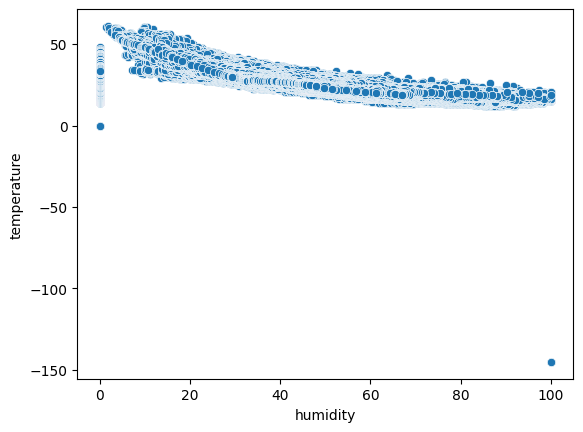

In [ ]:
# Scatter plot to observe relationship
sns.scatterplot(data=df, x = 'humidity', y = 'temperature')


## Data Preprocessing

In [ ]:
# Drop any rows with missing values
df.dropna(inplace=True)


In [ ]:
# Define features
x = df.iloc[:, [0,1,2,3,5]]
x

,sensor_id,lat,lon,pressure,humidity
0,2266,42.738,23.272,95270.27,62.48
1,2292,42.663,23.273,94355.83,59.46
2,3096,42.700,23.360,95155.81,44.38
3,3428,42.624,23.406,94679.57,38.28
4,3472,42.669,23.318,94327.88,46.37
...,...,...,...,...,...
701543,3558,42.671,23.364,95562.08,52.28
701544,3836,42.702,23.371,96070.06,56.84
701545,3296,42.671,23.325,95230.42,51.72
701546,2234,42.685,23.356,95653.14,49.78


In [ ]:
# define target
y = df['temperature']
y

,temperature
0,23.46
1,23.06
2,26.53
3,28.34
4,26.31
...,...
701543,21.99
701544,21.41
701545,22.53
701546,23.01


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Model Training

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [ ]:
# Predict
ypred = model.predict(x_test)

## Evaluation


In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.


In [ ]:
# result
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 96.09688392651927
R-squared: 0.5044881050314327
